In [2]:




import numpy as np   


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
mpg_df = pd.read_csv("../input/autompg-dataset/auto-mpg.csv")

In [4]:
mpg_df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
mpg_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
mpg_df=mpg_df.replace('?',np.nan)

In [8]:
mpg_df=mpg_df.drop('car name',axis=1)

In [9]:
mpg_df=mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [10]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [15]:

X = mpg_df.drop('mpg', axis=1)
y = mpg_df[['mpg']]


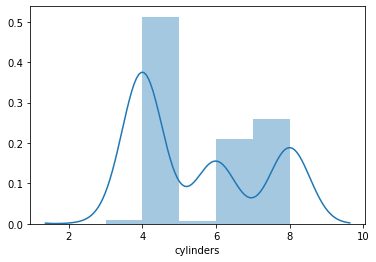

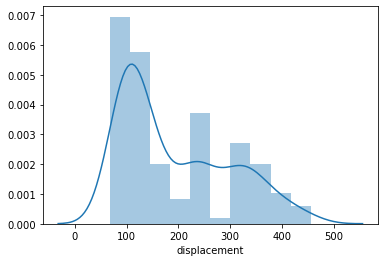

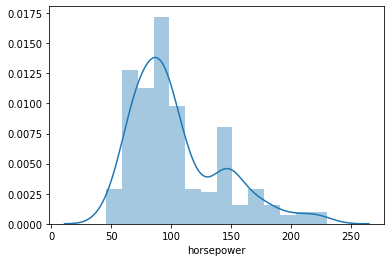

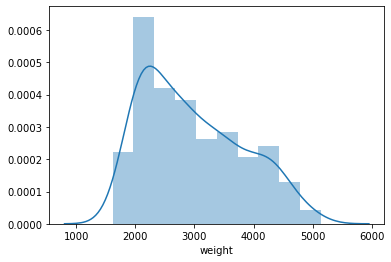

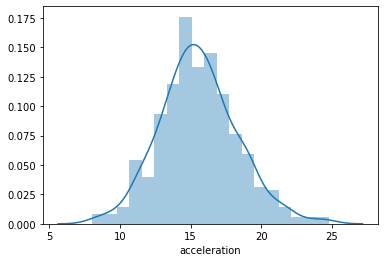

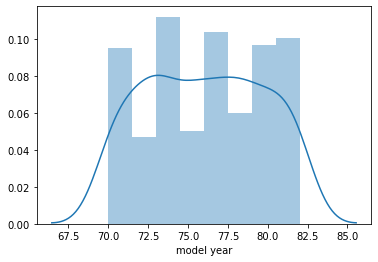

In [16]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(X[i])

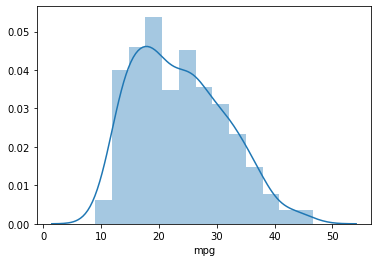

In [27]:
sns.distplot(y['mpg'])

In [17]:
from sklearn import preprocessing

# scale all the columns of the mpg_df.  produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 

In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [19]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.08561436895562699
The coefficient for displacement is 0.3044182253593027
The coefficient for horsepower is -0.09718466302484197
The coefficient for weight is -0.7628632829136764
The coefficient for acceleration is 0.021591275172924747
The coefficient for model year is 0.3749408074118715
The coefficient for origin is 0.1230263702455687


In [21]:
intercept = regression_model.intercept_[0]

print("The intercept for  model is {}".format(intercept))

The intercept for  model is 0.01283312829399292


In [22]:
ridge = Ridge(alpha=.3) 
ridge.fit(X_train,y_train)
for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.08073001909555806:
Ridge model coefficients for displacement is 0.28822207417230994:
Ridge model coefficients for horsepower is -0.09985675156606053:
Ridge model coefficients for weight is -0.7510550916024458:
Ridge model coefficients for acceleration is 0.01912769831483247:
Ridge model coefficients for model year is 0.3737831248958427:
Ridge model coefficients for origin is 0.12212717285800222:


In [23]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.013280002937314576:
Lasso model coefficients for weight is -0.6205207866794482:
Lasso model coefficients for acceleration is 0.0:
Lasso model coefficients for model year is 0.29198732924913473:
Lasso model coefficients for origin is 0.021567653979880638:


In [24]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8081802739111359
0.8472274567567306


In [25]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140555


In [26]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161
